<a href="https://colab.research.google.com/github/rehman0211/android_plant_disease_detection/blob/master/plant_disease_mobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from __future__ import absolute_import,division,print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
tf.logging.set_verbosity(tf.logging.ERROR)

import pandas as pd
import numpy as np
import os
import glob
import shutil

print(tf.__version__)

1.14.0


In [13]:
 !git clone https://github.com/rehman0211/android_plant_disease_detection

fatal: destination path 'android_plant_disease_detection' already exists and is not an empty directory.


In [0]:
project_dir = os.listdir('/content/android_plant_disease_detection/color')

In [15]:
len(project_dir)

40

In [0]:
project_path = '/content/android_plant_disease_detection/color'

In [0]:
classes=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Blueberry___healthy','Cherry_(including_sour)___Powdery_mildew','Cherry_(including_sour)___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Raspberry___healthy','Soybean___healthy','Squash___Powdery_mildew','Strawberry___Leaf_scorch','Strawberry___healthy','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','/content/color/Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Tomato_mosaic_virus','Tomato___healthy']

In [11]:
for cl in classes:
  #img_path = os.path.join(project_dir, cl)
  images = glob.glob('/content/android_plant_disease_detection/color'+'/'+cl+'/*.JPG')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(project_path, 'train', cl)):
      os.makedirs(os.path.join(project_path, 'train', cl))
    shutil.move(t, os.path.join(project_path, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(project_path, 'val', cl)):
      os.makedirs(os.path.join(project_path, 'val', cl))
    shutil.move(v, os.path.join(project_path, 'val', cl))

Apple___Apple_scab: 630 Images
Apple___Black_rot: 621 Images
Apple___Cedar_apple_rust: 275 Images
Apple___healthy: 1645 Images
Blueberry___healthy: 1502 Images
Cherry_(including_sour)___Powdery_mildew: 1052 Images
Cherry_(including_sour)___healthy: 854 Images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 446 Images
Corn_(maize)___Common_rust_: 1192 Images
Corn_(maize)___Northern_Leaf_Blight: 870 Images
Corn_(maize)___healthy: 21 Images
Grape___Black_rot: 1180 Images
Grape___Esca_(Black_Measles): 1383 Images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076 Images
Grape___healthy: 423 Images
Orange___Haunglongbing_(Citrus_greening): 5507 Images
Peach___Bacterial_spot: 2297 Images
Peach___healthy: 360 Images
Pepper,_bell___Bacterial_spot: 997 Images
Pepper,_bell___healthy: 1476 Images
Potato___Early_blight: 1000 Images
Potato___Late_blight: 1000 Images
Potato___healthy: 152 Images
Raspberry___healthy: 371 Images
Soybean___healthy: 5090 Images
Squash___Powdery_mildew: 1813 Images
Str

In [0]:
train_dir = os.listdir('/content/android_plant_disease_detection/color/train')
val_dir = os.listdir('/content/android_plant_disease_detection/color/val')

In [16]:
len(train_dir)
len(val_dir)

38

In [0]:
total_train = len(train_dir)
total_validation = len(val_dir)

In [0]:
IMG_SHAPE = 224
BATCH_SIZE = 32


In [0]:
#rescale the values form 0 to 255 into 0 to 1
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [20]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                          directory='/content/android_plant_disease_detection/color/train',
                                                          shuffle = True,#for randomly getting the data, not to learn the Sequence
                                                          target_size = (IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                          class_mode='binary')

Found 42246 images belonging to 38 classes.


In [21]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                          directory='/content/android_plant_disease_detection/color/val',
                                                          shuffle = False,#for randomly getting the data, not to learn the Sequence
                                                          target_size = (IMG_SHAPE,IMG_SHAPE), #(256,256)
                                                          class_mode='binary')

Found 10557 images belonging to 38 classes.


In [22]:
train_dir[0]

'Potato___Late_blight'

In [23]:
mobile = keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 1s 0us/step


In [0]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                  input_shape=(IMG_SHAPE, IMG_SHAPE, 3))
#base_model = tf.keras.applications.MobileNetV2(
 #   input_shape=(IMG_SHAPE, IMG_SHAPE, 3),
  #  weights='imagenet',
   # include_top = False
#)

In [0]:

feature_extractor.trainable = False

In [26]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(38, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 38)                48678     
Total params: 2,306,662
Trainable params: 48,678
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])



In [28]:
EPOCHS = 6

history = model.fit_generator(
                    train_data_gen,
                    steps_per_epoch = 70,
                    epochs=EPOCHS,
                    validation_data=val_data_gen)

Epoch 1/6
70/70 [==============================] - 38s 549ms/step - loss: 1.9509 - acc: 0.5201 - val_loss: 1.0409 - val_acc: 0.7531
Epoch 2/6
70/70 [==============================] - 33s 467ms/step - loss: 0.8312 - acc: 0.7978 - val_loss: 0.6598 - val_acc: 0.8393
Epoch 3/6
70/70 [==============================] - 33s 465ms/step - loss: 0.5673 - acc: 0.8603 - val_loss: 0.5032 - val_acc: 0.8768
Epoch 4/6
70/70 [==============================] - 32s 459ms/step - loss: 0.4585 - acc: 0.8795 - val_loss: 0.4247 - val_acc: 0.8897
Epoch 5/6
70/70 [==============================] - 32s 457ms/step - loss: 0.3876 - acc: 0.8982 - val_loss: 0.3646 - val_acc: 0.9039
Epoch 6/6
70/70 [==============================] - 32s 459ms/step - loss: 0.3565 - acc: 0.9067 - val_loss: 0.3405 - val_acc: 0.9098


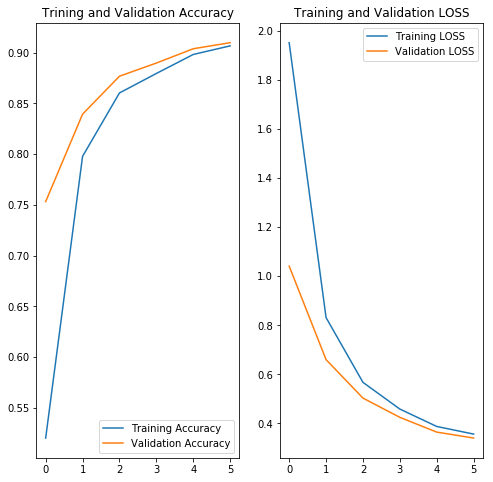

In [30]:
import matplotlib.pyplot as plt
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs_range = range(EPOCHS)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Trining and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training LOSS')
plt.plot(epochs_range,val_loss,label='Validation LOSS')
plt.legend(loc='upper right')
plt.title('Training and Validation LOSS')

plt.savefig('./foo.png')
plt.show()

In [0]:
!git push

In [0]:
!git commit -m "MobileNet architechture added"